<a href="https://colab.research.google.com/github/khusheedhanuka/image_captioning/blob/main/image_preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install virtualenv
!virtualenv imagecaptioning

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 12.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.9/468.9 kB 31.8 MB/s eta 0:00:00
created virtual environment CPython3.10.12.final.0-64 in 2071ms
  creator CPython3Posix(dest=/content/imagecaptioning, clear=False, no_vcs_ignore=False, global=False)
  seeder FromAppData(download=False, pip=bundle, setuptools=bundle, wheel=bundle, via=copy, app_data_dir=/root/.local/share/virtualenv)
    added seed packages: pip==23.3.1, setuptools==69.0.2, wheel==0.42.0
  activators BashActivator,CShellActivator,FishActivator,NushellActivator,PowerShellActivator,PythonActivator


In [ ]:
!source imagecaptioning/bin/activate

In [ ]:
!pip install keras_preprocessing

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 647.0 kB/s eta 0:00:00


In [ ]:
!pip install gradio tensorflow


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.6/16.6 MB 50.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.1/93.1 kB 11.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 304.8/304.8 kB 36.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 10.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.7/138.7 kB 12.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 381.9/381.9 kB 19.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.7/45.7 kB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.7/59.7 kB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 35.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.0/67.0 kB 6.5 MB/

In [ ]:
!pip uninstall tensorflow probability

Found existing installation: tensorflow 2.15.0
Uninstalling tensorflow-2.15.0:
  Would remove:
    /usr/local/bin/estimator_ckpt_converter
    /usr/local/bin/import_pb_to_tensorboard
    /usr/local/bin/saved_model_cli
    /usr/local/bin/tensorboard
    /usr/local/bin/tf_upgrade_v2
    /usr/local/bin/tflite_convert
    /usr/local/bin/toco
    /usr/local/bin/toco_from_protos
    /usr/local/lib/python3.10/dist-packages/tensorflow-2.15.0.dist-info/*
    /usr/local/lib/python3.10/dist-packages/tensorflow/*
Proceed (Y/n)? y
  Successfully uninstalled tensorflow-2.15.0


In [ ]:
# !pip install -q condacolab
# import condacolab
# condacolab.install()

In [ ]:
# !conda update -n base -c conda-forge conda

In [ ]:
import os
import pickle
import numpy as np
from tqdm.notebook import tqdm
import pandas as pd
from collections import Counter





In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
captions_data='/content/drive/MyDrive/image_captioning/captions.txt/captions.txt'
image_data='/content/drive/MyDrive/image_captioning/Images'
BASE_DIR='/content/drive/MyDrive/image_captioning'

In [ ]:
file = open(captions_data, 'r')
lines = file.readlines()
file.close()


lines = lines[1:]

datatxt = []
for line in lines:
    col = line.strip().split(',')
    w = col[0].split("#")
    datatxt.append(w + [col[1].lower()])

df_txt = pd.DataFrame(datatxt, columns=["image", "caption"])


In [ ]:
df_txt[:6]

,image,caption
0,1000268201_693b08cb0e.jpg,a child in a pink dress is climbing up a set o...
1,1000268201_693b08cb0e.jpg,a girl going into a wooden building .
2,1000268201_693b08cb0e.jpg,a little girl climbing into a wooden playhouse .
3,1000268201_693b08cb0e.jpg,a little girl climbing the stairs to her playh...
4,1000268201_693b08cb0e.jpg,a little girl in a pink dress going into a woo...
5,1001773457_577c3a7d70.jpg,a black dog and a spotted dog are fighting


In [ ]:
len(df_txt['image'].unique())

8091

In [ ]:
len(df_txt['image'])

40455

In [ ]:
from keras_preprocessing.image import load_img
from keras_preprocessing.image import img_to_array
import matplotlib.pyplot as plt

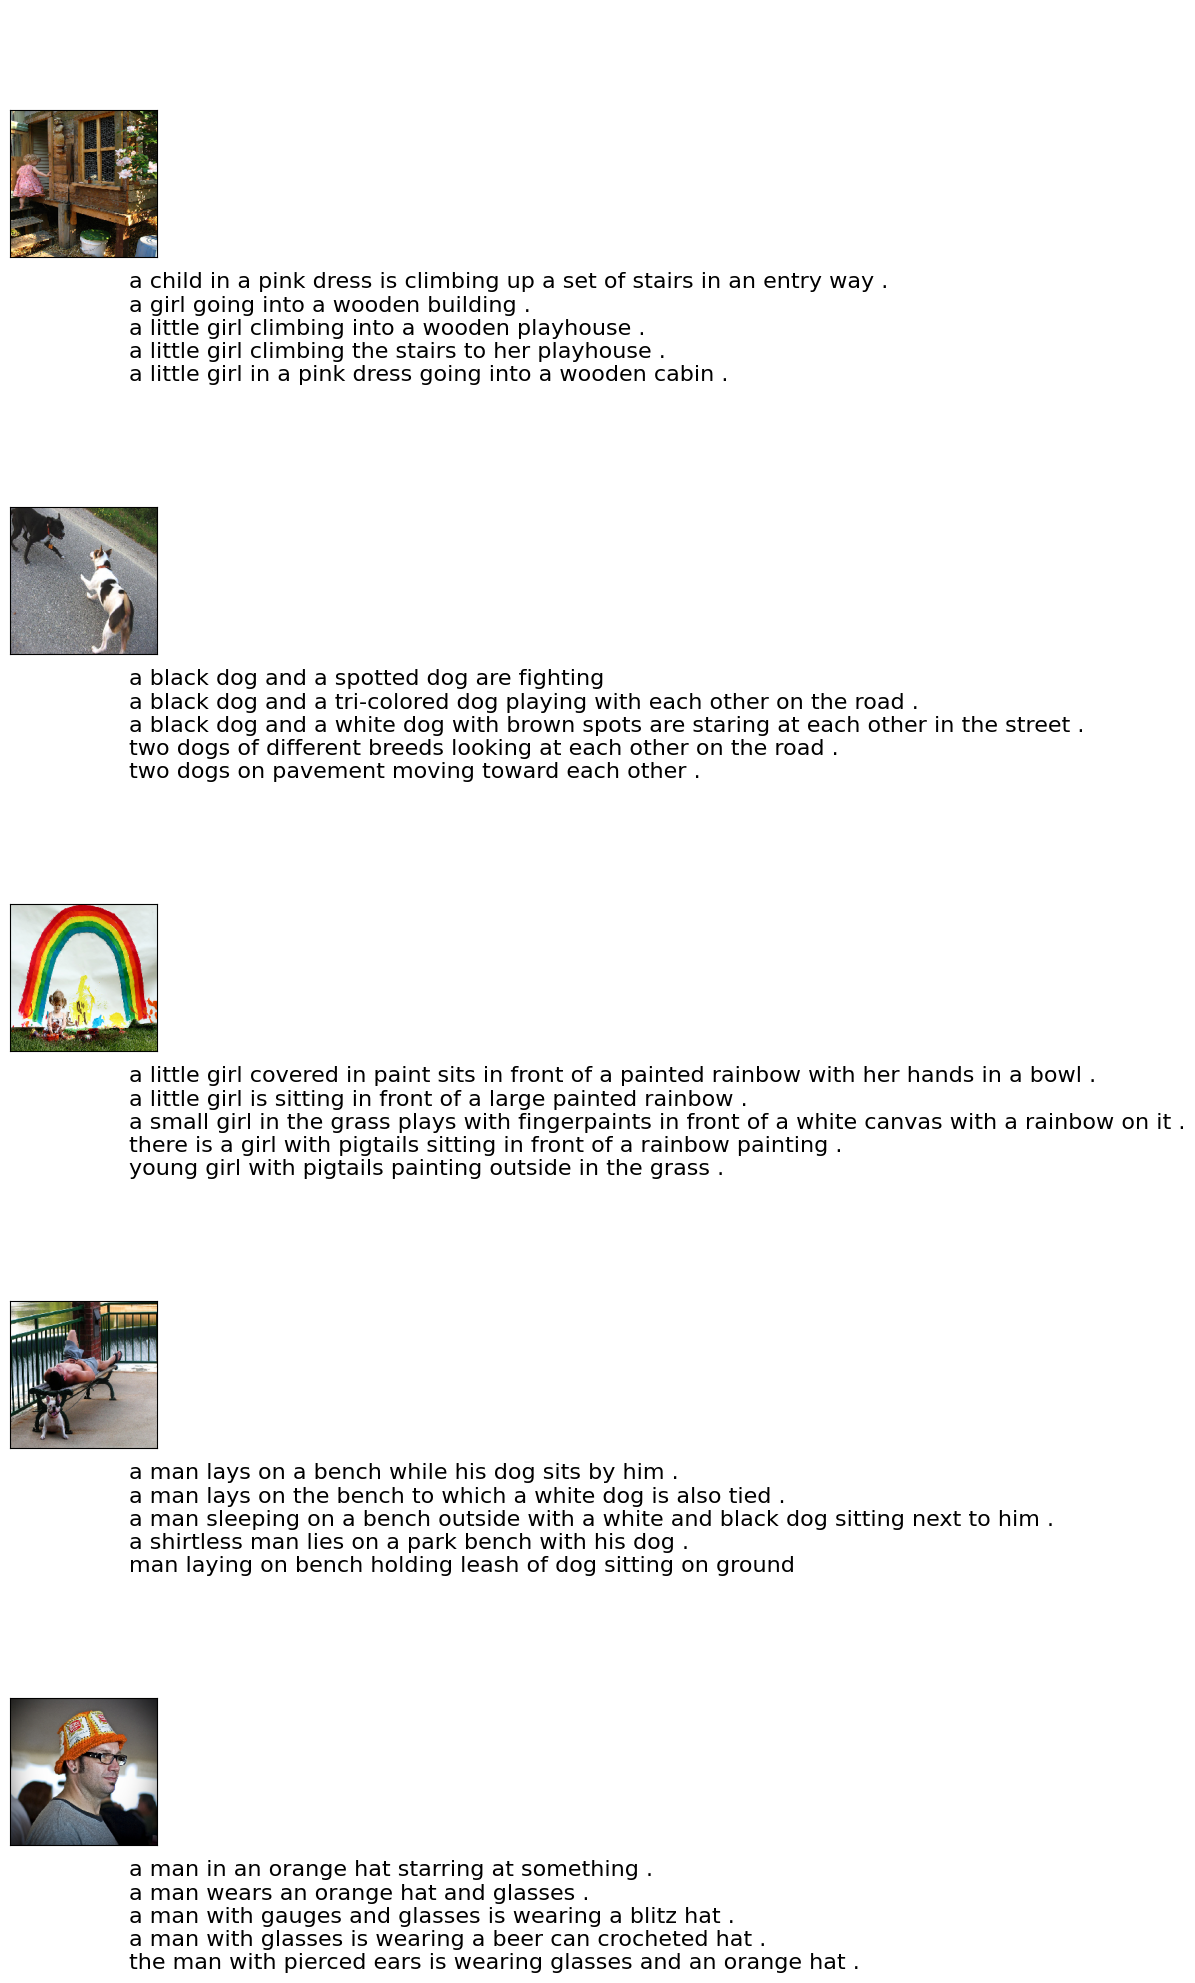

In [ ]:
uni_filenames = np.unique(df_txt.image.values)
num = 5
size = 224
target_size = (size, size, 3)
count = 1
fig = plt.figure(figsize=(10, 20))

for jpgimg in uni_filenames[:num]:
    fileimg = image_data + '/' + jpgimg
    captions = list(df_txt['caption'].loc[df_txt["image"] == jpgimg].values)
    image_load = load_img(fileimg, target_size=target_size)

    ax = fig.add_subplot(num, 2, count, xticks=[], yticks=[])
    ax.imshow(image_load)
    count += 1

    ax = fig.add_subplot(num, 2, count)
    plt.axis('off')
    ax.plot()
    ax.set_xlim(0, 1)


    if captions:
        ax.set_ylim(0, len(captions) + 1)
        ax.text(0, 0.5, '\n'.join(captions), fontsize=16, va='center', color='black')
    else:
        ax.set_ylim(0, 1)

    count += 1

plt.tight_layout()
plt.show()


In [ ]:
def df_word(df_txt):
    vocabulary = []
    for txt in df_txt.caption.values:
        vocabulary.extend(txt.split())
    print('Vocabulary Size: %d' % len(set(vocabulary)))
    ct = Counter(vocabulary)
    dfword = pd.DataFrame(list(ct.items()), columns=['word', 'count'])
    dfword.sort_values(by='count', ascending=False, inplace=True)
    dfword = dfword.reset_index()[["word","count"]]
    return(dfword)
dfword = df_word(df_txt)
dfword.head(5)

Vocabulary Size: 8871


,word,count
0,a,60196
1,.,34205
2,in,18174
3,the,17507
4,on,10357


In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords


stopwords.words('english')[0:500:25]

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


['i', 'herself', 'been', 'with', 'here', 'very', 'doesn', 'won']

In [ ]:
print(df_txt['caption'].isnull().sum())
print(df_txt['image'].isnull().sum())

0
0


In [ ]:
import string
def remove_punct(text):
    text_nopunct = "".join([char for char in text if char not in string.punctuation])
    return text_nopunct

df_txt['caption_clean'] = df_txt['caption'].apply(lambda x: remove_punct(x))

df_txt.head()

,image,caption,caption_clean
0,1000268201_693b08cb0e.jpg,a child in a pink dress is climbing up a set o...,a child in a pink dress is climbing up a set o...
1,1000268201_693b08cb0e.jpg,a girl going into a wooden building .,a girl going into a wooden building
2,1000268201_693b08cb0e.jpg,a little girl climbing into a wooden playhouse .,a little girl climbing into a wooden playhouse
3,1000268201_693b08cb0e.jpg,a little girl climbing the stairs to her playh...,a little girl climbing the stairs to her playh...
4,1000268201_693b08cb0e.jpg,a little girl in a pink dress going into a woo...,a little girl in a pink dress going into a woo...


In [ ]:
import re

def tokenize(text):
    tokens = re.split('\W+', text)
    return tokens

df_txt['caption_tokenized'] = df_txt['caption_clean'].apply(lambda x: tokenize(x.lower()))

df_txt.head()

,image,caption,caption_clean,caption_tokenized
0,1000268201_693b08cb0e.jpg,a child in a pink dress is climbing up a set o...,a child in a pink dress is climbing up a set o...,"[a, child, in, a, pink, dress, is, climbing, u..."
1,1000268201_693b08cb0e.jpg,a girl going into a wooden building .,a girl going into a wooden building,"[a, girl, going, into, a, wooden, building, ]"
2,1000268201_693b08cb0e.jpg,a little girl climbing into a wooden playhouse .,a little girl climbing into a wooden playhouse,"[a, little, girl, climbing, into, a, wooden, p..."
3,1000268201_693b08cb0e.jpg,a little girl climbing the stairs to her playh...,a little girl climbing the stairs to her playh...,"[a, little, girl, climbing, the, stairs, to, h..."
4,1000268201_693b08cb0e.jpg,a little girl in a pink dress going into a woo...,a little girl in a pink dress going into a woo...,"[a, little, girl, in, a, pink, dress, going, i..."


In [ ]:

stopword = nltk.corpus.stopwords.words('english')
def remove_stopwords(tokenized_list):
    text = [word for word in tokenized_list if word not in stopword]
    return text

df_txt['caption_nostop'] = df_txt['caption_tokenized'].apply(lambda x: remove_stopwords(x))

df_txt.head()

,image,caption,caption_clean,caption_tokenized,caption_nostop
0,1000268201_693b08cb0e.jpg,a child in a pink dress is climbing up a set o...,a child in a pink dress is climbing up a set o...,"[a, child, in, a, pink, dress, is, climbing, u...","[child, pink, dress, climbing, set, stairs, en..."
1,1000268201_693b08cb0e.jpg,a girl going into a wooden building .,a girl going into a wooden building,"[a, girl, going, into, a, wooden, building, ]","[girl, going, wooden, building, ]"
2,1000268201_693b08cb0e.jpg,a little girl climbing into a wooden playhouse .,a little girl climbing into a wooden playhouse,"[a, little, girl, climbing, into, a, wooden, p...","[little, girl, climbing, wooden, playhouse, ]"
3,1000268201_693b08cb0e.jpg,a little girl climbing the stairs to her playh...,a little girl climbing the stairs to her playh...,"[a, little, girl, climbing, the, stairs, to, h...","[little, girl, climbing, stairs, playhouse, ]"
4,1000268201_693b08cb0e.jpg,a little girl in a pink dress going into a woo...,a little girl in a pink dress going into a woo...,"[a, little, girl, in, a, pink, dress, going, i...","[little, girl, pink, dress, going, wooden, cab..."


In [ ]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
wn = nltk.WordNetLemmatizer()
def lemmatizing(tokenized_text):
    text = [wn.lemmatize(word) for word in tokenized_text]
    return text

df_txt['caption_lemmatized'] = df_txt['caption_nostop'].apply(lambda x: lemmatizing(x))

df_txt.head(10)

df_txt['caption_lemmatized']

0        [child, pink, dress, climbing, set, stair, ent...
1                        [girl, going, wooden, building, ]
2            [little, girl, climbing, wooden, playhouse, ]
3             [little, girl, climbing, stair, playhouse, ]
4        [little, girl, pink, dress, going, wooden, cab...
                               ...                        
40450                [man, pink, shirt, climb, rock, face]
40451                   [man, rock, climbing, high, air, ]
40452    [person, red, shirt, climbing, rock, face, cov...
40453                        [rock, climber, red, shirt, ]
40454    [rock, climber, practice, rock, climbing, wall, ]
Name: caption_lemmatized, Length: 40455, dtype: object

In [ ]:
df_txt['caption_lemma_withstop']=df_txt['caption_tokenized'].apply(lambda x:lemmatizing(x))



In [ ]:
df_txt.head()

,image,caption,caption_clean,caption_tokenized,caption_nostop,caption_lemmatized,caption_lemma_withstop
0,1000268201_693b08cb0e.jpg,a child in a pink dress is climbing up a set o...,a child in a pink dress is climbing up a set o...,"[a, child, in, a, pink, dress, is, climbing, u...","[child, pink, dress, climbing, set, stairs, en...","[child, pink, dress, climbing, set, stair, ent...","[a, child, in, a, pink, dress, is, climbing, u..."
1,1000268201_693b08cb0e.jpg,a girl going into a wooden building .,a girl going into a wooden building,"[a, girl, going, into, a, wooden, building, ]","[girl, going, wooden, building, ]","[girl, going, wooden, building, ]","[a, girl, going, into, a, wooden, building, ]"
2,1000268201_693b08cb0e.jpg,a little girl climbing into a wooden playhouse .,a little girl climbing into a wooden playhouse,"[a, little, girl, climbing, into, a, wooden, p...","[little, girl, climbing, wooden, playhouse, ]","[little, girl, climbing, wooden, playhouse, ]","[a, little, girl, climbing, into, a, wooden, p..."
3,1000268201_693b08cb0e.jpg,a little girl climbing the stairs to her playh...,a little girl climbing the stairs to her playh...,"[a, little, girl, climbing, the, stairs, to, h...","[little, girl, climbing, stairs, playhouse, ]","[little, girl, climbing, stair, playhouse, ]","[a, little, girl, climbing, the, stair, to, he..."
4,1000268201_693b08cb0e.jpg,a little girl in a pink dress going into a woo...,a little girl in a pink dress going into a woo...,"[a, little, girl, in, a, pink, dress, going, i...","[little, girl, pink, dress, going, wooden, cab...","[little, girl, pink, dress, going, wooden, cab...","[a, little, girl, in, a, pink, dress, going, i..."


In [ ]:
vocab={}

for caption in df_txt['caption_lemma_withstop']:
  for token in caption:
    if token not in vocab:
      vocab[token]=len(vocab)

In [ ]:
vocab

{'a': 0,
 'child': 1,
 'in': 2,
 'pink': 3,
 'dress': 4,
 'is': 5,
 'climbing': 6,
 'up': 7,
 'set': 8,
 'of': 9,
 'stair': 10,
 'an': 11,
 'entry': 12,
 'way': 13,
 '': 14,
 'girl': 15,
 'going': 16,
 'into': 17,
 'wooden': 18,
 'building': 19,
 'little': 20,
 'playhouse': 21,
 'the': 22,
 'to': 23,
 'her': 24,
 'cabin': 25,
 'black': 26,
 'dog': 27,
 'and': 28,
 'spotted': 29,
 'are': 30,
 'fighting': 31,
 'tricolored': 32,
 'playing': 33,
 'with': 34,
 'each': 35,
 'other': 36,
 'on': 37,
 'road': 38,
 'white': 39,
 'brown': 40,
 'spot': 41,
 'staring': 42,
 'at': 43,
 'street': 44,
 'two': 45,
 'different': 46,
 'breed': 47,
 'looking': 48,
 'pavement': 49,
 'moving': 50,
 'toward': 51,
 'covered': 52,
 'paint': 53,
 'sits': 54,
 'front': 55,
 'painted': 56,
 'rainbow': 57,
 'hand': 58,
 'bowl': 59,
 'sitting': 60,
 'large': 61,
 'small': 62,
 'grass': 63,
 'play': 64,
 'fingerpaint': 65,
 'canvas': 66,
 'it': 67,
 'there': 68,
 'pigtail': 69,
 'painting': 70,
 'young': 71,
 'outsi

In [ ]:
len(vocab)

7447

In [ ]:
max_len=max(len(tokenized_list) for tokenized_list in df_txt['caption_lemma_withstop'])
max_len

34

In [ ]:
special_tokens = ["<PAD>", "<START>", "<END>", "<UNK>"]
for token in special_tokens:
    vocab[token] = len(vocab)


In [ ]:
def add_padding(list):
   padding_len=max_len-len(list)
   if padding_len > 0:
        # Add '<PAD>' tokens to pad the list
        padding_seq = list + ["<PAD>"] * padding_len
        return padding_seq
   else:
        # No padding needed, return the original list
        return list

In [ ]:
df_txt["padded_txt"]=df_txt['caption_lemmatized'].apply(lambda x:add_padding(x))
df_txt.head()

,image,caption,caption_clean,caption_tokenized,caption_nostop,caption_lemmatized,caption_lemma_withstop,padded_txt
0,1000268201_693b08cb0e.jpg,a child in a pink dress is climbing up a set o...,a child in a pink dress is climbing up a set o...,"[a, child, in, a, pink, dress, is, climbing, u...","[child, pink, dress, climbing, set, stairs, en...","[child, pink, dress, climbing, set, stair, ent...","[a, child, in, a, pink, dress, is, climbing, u...","[child, pink, dress, climbing, set, stair, ent..."
1,1000268201_693b08cb0e.jpg,a girl going into a wooden building .,a girl going into a wooden building,"[a, girl, going, into, a, wooden, building, ]","[girl, going, wooden, building, ]","[girl, going, wooden, building, ]","[a, girl, going, into, a, wooden, building, ]","[girl, going, wooden, building, , <PAD>, <PAD>..."
2,1000268201_693b08cb0e.jpg,a little girl climbing into a wooden playhouse .,a little girl climbing into a wooden playhouse,"[a, little, girl, climbing, into, a, wooden, p...","[little, girl, climbing, wooden, playhouse, ]","[little, girl, climbing, wooden, playhouse, ]","[a, little, girl, climbing, into, a, wooden, p...","[little, girl, climbing, wooden, playhouse, , ..."
3,1000268201_693b08cb0e.jpg,a little girl climbing the stairs to her playh...,a little girl climbing the stairs to her playh...,"[a, little, girl, climbing, the, stairs, to, h...","[little, girl, climbing, stairs, playhouse, ]","[little, girl, climbing, stair, playhouse, ]","[a, little, girl, climbing, the, stair, to, he...","[little, girl, climbing, stair, playhouse, , <..."
4,1000268201_693b08cb0e.jpg,a little girl in a pink dress going into a woo...,a little girl in a pink dress going into a woo...,"[a, little, girl, in, a, pink, dress, going, i...","[little, girl, pink, dress, going, wooden, cab...","[little, girl, pink, dress, going, wooden, cab...","[a, little, girl, in, a, pink, dress, going, i...","[little, girl, pink, dress, going, wooden, cab..."


In [ ]:
df_txt['padded_txt'][0]

['child',
 'pink',
 'dress',
 'climbing',
 'set',
 'stair',
 'entry',
 'way',
 '',
 '<PAD>',
 '<PAD>',
 '<PAD>',
 '<PAD>',
 '<PAD>',
 '<PAD>',
 '<PAD>',
 '<PAD>',
 '<PAD>',
 '<PAD>',
 '<PAD>',
 '<PAD>',
 '<PAD>',
 '<PAD>',
 '<PAD>',
 '<PAD>',
 '<PAD>',
 '<PAD>',
 '<PAD>',
 '<PAD>',
 '<PAD>',
 '<PAD>',
 '<PAD>',
 '<PAD>',
 '<PAD>']

In [ ]:
!pip install tensorflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.2/475.2 MB 3.4 MB/s eta 0:00:00


Image preprocessing


In [ ]:
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Model
from tensorflow.keras.utils import to_categorical, plot_model
from tensorflow.keras.layers import Input, Dense, LSTM, Embedding, Dropout, add

In [ ]:
imgpath=image_data+'/'+df_txt['image'][0]


In [ ]:
imgpath

'/content/drive/MyDrive/image_captioning/Images/1000268201_693b08cb0e.jpg'

In [ ]:
model= VGG16()

553467096/553467096 [==============================] - 4s 0us/step


In [ ]:
model=Model(inputs=model.inputs, outputs=model.layers[-2].output)

Model to extract image features


In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
# features = {}
# directory = os.path.join(BASE_DIR, 'Images')

# for img_name in tqdm(os.listdir(directory)):

#     img_path = directory + '/' + img_name
#     image = load_img(img_path, target_size=(224, 224))

#     image = img_to_array(image)

#     image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))

#     image = preprocess_input(image)

#     feature = model.predict(image, verbose=0)

#     image_id = img_name.split('.')[0]

#     features[image_id] = feature

In [ ]:
# pickle.dump(features,open(os.path.join(BASE_DIR,'features.pkl'),'wb'))

In [ ]:

features = {}

file_path = os.path.join(BASE_DIR, 'features.pkl')
with open(file_path, 'rb') as file:
    features = pickle.load(file)

In [ ]:
with open(os.path.join(BASE_DIR,'captions.txt','captions.txt'), 'r') as f:
    next(f)
    captions_doc = f.read()

In [ ]:

mapping = {}

for line in tqdm(captions_doc.split('\n')):

    tokens = line.split(',')
    if len(line) < 2:
        continue
    image_id, caption = tokens[0], tokens[1:]

    image_id = image_id.split('.')[0]

    caption = " ".join(caption)

    if image_id not in mapping:
        mapping[image_id] = []

    mapping[image_id].append(caption)

  0%|          | 0/40456 [00:00<?, ?it/s]

In [ ]:
mapping

{'1000268201_693b08cb0e': ['A child in a pink dress is climbing up a set of stairs in an entry way .',
  'A girl going into a wooden building .',
  'A little girl climbing into a wooden playhouse .',
  'A little girl climbing the stairs to her playhouse .',
  'A little girl in a pink dress going into a wooden cabin .'],
 '1001773457_577c3a7d70': ['A black dog and a spotted dog are fighting',
  'A black dog and a tri-colored dog playing with each other on the road .',
  'A black dog and a white dog with brown spots are staring at each other in the street .',
  'Two dogs of different breeds looking at each other on the road .',
  'Two dogs on pavement moving toward each other .'],
 '1002674143_1b742ab4b8': ['A little girl covered in paint sits in front of a painted rainbow with her hands in a bowl .',
  'A little girl is sitting in front of a large painted rainbow .',
  'A small girl in the grass plays with fingerpaints in front of a white canvas with a rainbow on it .',
  'There is a gi

In [ ]:
len(mapping)

8091

In [ ]:
def clean(mapping):
    for key, captions in mapping.items():
        for i in range(len(captions)):
            caption = captions[i]
            caption = caption.lower()
            caption = caption.replace('[^A-Za-z]', '')

            caption = caption.replace('\s+', ' ')

            caption = 'startseq ' + " ".join([word for word in caption.split() if len(word)>1]) + ' endseq'
            captions[i] = caption

In [ ]:
mapping['1000268201_693b08cb0e']

['A child in a pink dress is climbing up a set of stairs in an entry way .',
 'A girl going into a wooden building .',
 'A little girl climbing into a wooden playhouse .',
 'A little girl climbing the stairs to her playhouse .',
 'A little girl in a pink dress going into a wooden cabin .']

In [ ]:
clean(mapping)

In [ ]:
mapping['1000268201_693b08cb0e']

['startseq child in pink dress is climbing up set of stairs in an entry way endseq',
 'startseq girl going into wooden building endseq',
 'startseq little girl climbing into wooden playhouse endseq',
 'startseq little girl climbing the stairs to her playhouse endseq',
 'startseq little girl in pink dress going into wooden cabin endseq']

In [ ]:
all_captions = []
for key in mapping:
    for caption in mapping[key]:
        all_captions.append(caption)

In [ ]:
len(all_captions)

40455

In [ ]:
all_captions[:10]

['startseq child in pink dress is climbing up set of stairs in an entry way endseq',
 'startseq girl going into wooden building endseq',
 'startseq little girl climbing into wooden playhouse endseq',
 'startseq little girl climbing the stairs to her playhouse endseq',
 'startseq little girl in pink dress going into wooden cabin endseq',
 'startseq black dog and spotted dog are fighting endseq',
 'startseq black dog and tri-colored dog playing with each other on the road endseq',
 'startseq black dog and white dog with brown spots are staring at each other in the street endseq',
 'startseq two dogs of different breeds looking at each other on the road endseq',
 'startseq two dogs on pavement moving toward each other endseq']

In [ ]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(all_captions)
vocab_size = len(tokenizer.word_index) + 1

In [ ]:
tokenizer

In [ ]:
max_length = max(len(caption.split()) for caption in all_captions)
max_length

35

In [ ]:
image_ids = list(mapping.keys())
split = int(len(image_ids) * 0.90)
train = image_ids[:split]
test = image_ids[split:]

In [ ]:

def data_generator(data_keys, mapping, features, tokenizer, max_length, vocab_size, batch_size):


    X1=list()
    X2=list()
    y=list()
    n = 0
    while 1:
        for key in data_keys:
            n += 1
            captions = mapping[key]

            for caption in captions:

                seq = tokenizer.texts_to_sequences([caption])[0]

                for i in range(1, len(seq)):

                    in_seq, out_seq = seq[:i], seq[i]

                    in_seq = pad_sequences([in_seq], maxlen=max_length)[0]

                    out_seq = to_categorical([out_seq], num_classes=vocab_size)[0]

                    X1.append(features[key][0])
                    X2.append(in_seq)
                    y.append(out_seq)
            if n == batch_size:
                X1, X2, y = np.array(X1), np.array(X2), np.array(y)
                yield [X1, X2], y
                X1, X2, y = list(), list(), list()
                n = 0

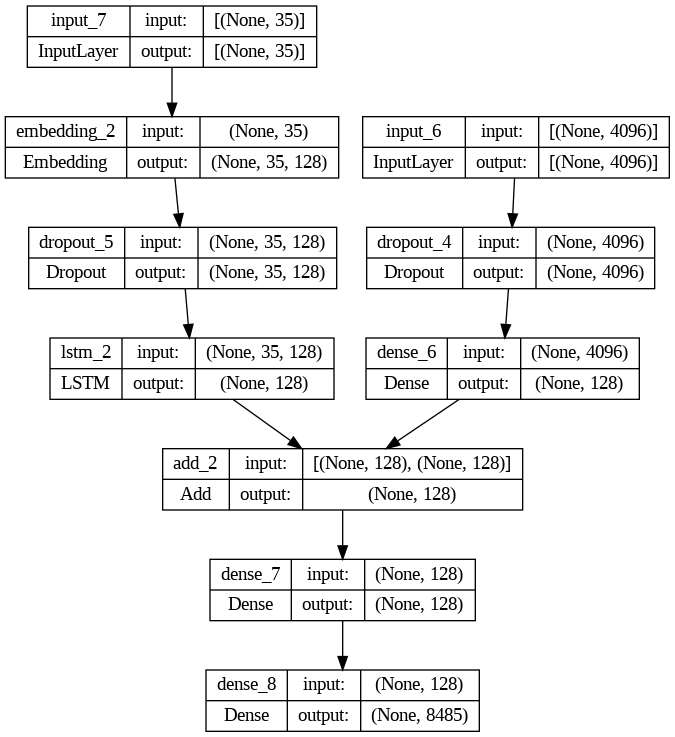

In [ ]:
# encoder model

inputs1 = Input(shape=(4096,))
fe1 = Dropout(0.2)(inputs1)
fe2 = Dense(128, activation='relu')(fe1)

inputs2 = Input(shape=(max_length,))
se1 = Embedding(vocab_size, 128, mask_zero=True)(inputs2)
se2 = Dropout(0.2)(se1)
se3 = LSTM(128)(se2)

# decoder model
decoder1 = add([fe2, se3])
decoder2 = Dense(128, activation='relu')(decoder1)
outputs = Dense(vocab_size, activation='softmax')(decoder2)

model2 = Model(inputs=[inputs1, inputs2], outputs=outputs)
model2.compile(loss='categorical_crossentropy', optimizer='adam')


plot_model(model2, show_shapes=True)

In [ ]:
model2.summary()

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_7 (InputLayer)        [(None, 35)]                 0         []                            
                                                                                                  
 input_6 (InputLayer)        [(None, 4096)]               0         []                            
                                                                                                  
 embedding_2 (Embedding)     (None, 35, 128)              1086080   ['input_7[0][0]']             
                                                                                                  
 dropout_4 (Dropout)         (None, 4096)                 0         ['input_6[0][0]']             
                                                                                            

In [ ]:

epochs = 20
batch_size = 32
steps = len(train) // batch_size

for i in range(epochs):

    generator = data_generator(train, mapping, features, tokenizer, max_length, vocab_size, batch_size)

    model2.fit(generator, epochs=1, steps_per_epoch=steps, verbose=1)

227/227 [==============================] - 61s 268ms/step - loss: 2.5046


In [ ]:
model2.save(BASE_DIR+'/model2.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
import h5py
from keras.models import load_model
h5f = h5py.File('/content/drive/MyDrive/image_captioning/model2.h5', 'r')
model2 = load_model(h5f)
h5f.close()


In [ ]:
def idx_to_word(integer, tokenizer):
    for word, index in tokenizer.word_index.items():
        if index == integer:
            return word
    return None

In [ ]:

def predict_caption(model, image, tokenizer, max_length):

    in_text = 'startseq'

    for i in range(max_length):

        sequence = tokenizer.texts_to_sequences([in_text])[0]

        sequence = pad_sequences([sequence], max_length)

        yhat = model.predict([image, sequence], verbose=0)

        yhat = np.argmax(yhat)

        word = idx_to_word(yhat, tokenizer)

        if word is None:
            break

        in_text += " " + word

        if word == 'endseq':
            break

    return in_text

In [ ]:
from nltk.translate.bleu_score import corpus_bleu

actual, predicted = list(), list()

for key in tqdm(test):

    captions = mapping[key]

    y_pred = predict_caption(model2, features[key], tokenizer, max_length)

    actual_captions = [caption.split() for caption in captions]
    y_pred = y_pred.split()

    actual.append(actual_captions)
    predicted.append(y_pred)

# accuracy score
print("BLEU-1: %f" % corpus_bleu(actual, predicted, weights=(1.0, 0, 0, 0)))
print("BLEU-2: %f" % corpus_bleu(actual, predicted, weights=(0.5, 0.5, 0, 0)))

  0%|          | 0/810 [00:00<?, ?it/s]

BLEU-1: 0.541022
BLEU-2: 0.315819


In [ ]:
from PIL import Image
import matplotlib.pyplot as plt
def generate_caption(image_name):
    image_id = image_name.split('.')[0]
    img_path = os.path.join(BASE_DIR, "Images", image_name)
    image = Image.open(img_path)
    captions = mapping[image_id]
    print('Actual')
    for caption in captions:
        print(caption)

    y_pred = predict_caption(model2, features[image_id], tokenizer, max_length)
    print('Predicted')
    print(y_pred)
    plt.imshow(image)

Actual
startseq black dog and spotted dog are fighting endseq
startseq black dog and tri-colored dog playing with each other on the road endseq
startseq black dog and white dog with brown spots are staring at each other in the street endseq
startseq two dogs of different breeds looking at each other on the road endseq
startseq two dogs on pavement moving toward each other endseq
Predicted
startseq two dogs are playing with each other in the snow endseq


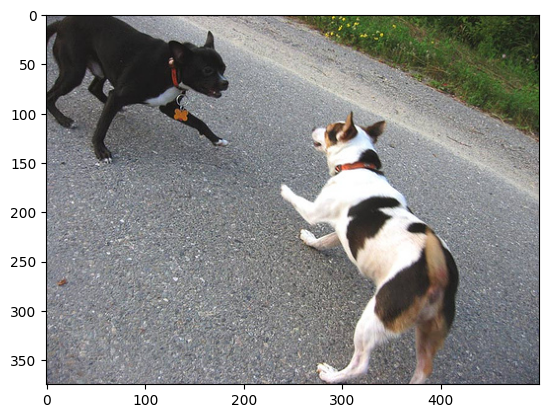

In [ ]:
generate_caption("1001773457_577c3a7d70.jpg")

Actual
startseq little girl covered in paint sits in front of painted rainbow with her hands in bowl endseq
startseq little girl is sitting in front of large painted rainbow endseq
startseq small girl in the grass plays with fingerpaints in front of white canvas with rainbow on it endseq
startseq there is girl with pigtails sitting in front of rainbow painting endseq
startseq young girl with pigtails painting outside in the grass endseq
Predicted
startseq little girl in red dress and white dress is sitting on the grass endseq


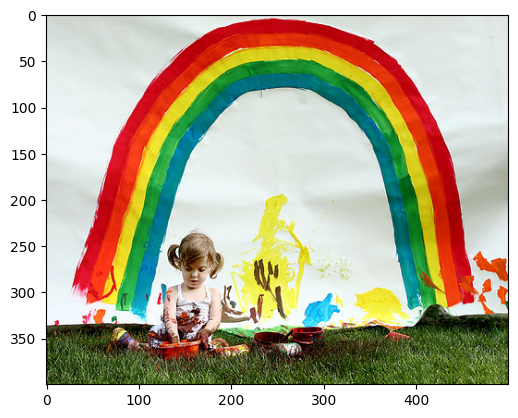

In [ ]:
generate_caption("1002674143_1b742ab4b8.jpg")

In [ ]:
import gradio as gr
import cv2

In [ ]:
def image_captioning(image):

   test_img = cv2.resize(image,(224,224))

   image_loaded = img_to_array(test_img)

   image = image_loaded.reshape((1, image_loaded.shape[0], image_loaded.shape[1], image_loaded.shape[2]))

   image = preprocess_input(image)

   feature = model.predict(image, verbose=0)

   ypred=predict_caption(model2,feature,tokenizer,max_length)

   return ypred



In [ ]:
import gradio as gr



iface = gr.Interface(
    fn=image_captioning,
    inputs= gr.Image(),
    outputs="text"
)
if __name__ == "__main__":
    iface.launch()

Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://3fea7653029fbde11e.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


In [ ]:
import gradio as gr

def greet(name):
    return "Hello " + name + "!"

demo = gr.Interface(fn=greet, inputs="text", outputs="text")

if __name__ == "__main__":
    demo.launch(show_api=False)

Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://33de5c9374768c6ee8.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)
